In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [4]:
carmpg = pd.read_excel(r"C:\Users\CG-DTE\Desktop\Copy of auto.xls")

In [5]:
carmpg.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
carmodel=pd.DataFrame(carmpg,columns=['mpg','acceleration'])
carmodel.head()

,mpg,acceleration
0,18.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5


In [35]:
def compute_residual_error(c,m,points):
    totalerror=0
    for i in range(0,len(points)):
        x=points[i,2]
        y=points[i,1]
        totalerror += (y-(m*x+c)**2)
        return totalerror/float(len(points))

In [36]:
def slope_of_descent(c_curr,m_curr,points,learning_rate):
    c_gradient=0
    m_gradient=0
    n=float(len(points))
    for i in range(0,len(points)):
        x = points[i,2]
        y = points[i,1]
        m_gradient += -(2/n)*(y-((m_curr*x)+c_curr))*x
        c_gradient += -(2/n)*(y-((m_curr*x)+c_curr))
        m_new = m_curr-(learning_rate * m_gradient)
        c_new = c_curr-(learning_rate * c_gradient)
    return(c_new,m_new)

In [37]:
def iteration(points,m_start,c_start,learning_rt,num_iterations):
    m=m_start
    c=c_start
    for i in range(num_iterations):
        c,m=slope_of_descent(c,m,points,learning_rt)
    return[c,m]

In [38]:
points=carmodel
points=points.reset_index().values

In [39]:
points

array([[  0. ,  18. ,  12. ],
       [  1. ,  15. ,  11.5],
       [  2. ,  18. ,  11. ],
       ...,
       [395. ,  32. ,  11.6],
       [396. ,  28. ,  18.6],
       [397. ,  31. ,  19.4]])

In [109]:
c_initial=0
m_initial=0
num_iterations=1000
learning_rate= 0.0001

In [110]:
[c,m] = iteration(points,m_initial,c_initial,learning_rate,num_iterations)

In [111]:
print('after {0} iteration m={1},c={2} and mse={3}'.format(num_iterations,m,c,compute_residual_error(c,m,points)))

after 1000 iteration m=1.4931509862180814,c=0.12252253313266287 and mse=-0.7724966434678613


In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

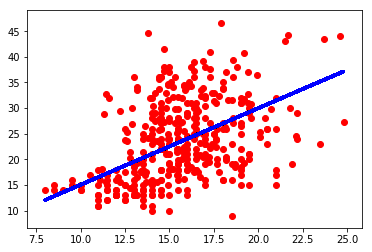

In [113]:
for i in range(0,len(points)):
    x=points[i,2]
    y=points[i,1]
    plt.scatter(x,y,color='red')
    plt.plot(carmodel.acceleration,((1.4931509862180814 * carmodel.acceleration)+0.12152253313266287),color='blue',linewidth=3)

In [ ]:
#Using trial and error method to find best fit curve

In [119]:
c_initial=0
m_initial=0
num_iterations=10
learning_rate= 0.01
[c,m] = iteration(points,m_initial,c_initial,learning_rate,num_iterations)
print('after {0} iteration m={1},c={2} and mse={3}'.format(num_iterations,m,c,compute_residual_error(c,m,points)))

after 10 iteration m=-1641299.336389371,c=-102239.88513617746 and mse=-984809419105.9463


In [120]:
c_initial=0
m_initial=0
num_iterations=10
learning_rate= 0.001
[c,m] = iteration(points,m_initial,c_initial,learning_rate,num_iterations)
print('after {0} iteration m={1},c={2} and mse={3}'.format(num_iterations,m,c,compute_residual_error(c,m,points)))

after 10 iteration m=1.493391518084555,c=0.09598565706455763 and mse=-0.770354014619362


In [121]:
c_initial=0
m_initial=0
num_iterations=10
learning_rate= 0.0001
[c,m] = iteration(points,m_initial,c_initial,learning_rate,num_iterations)
print('after {0} iteration m={1},c={2} and mse={3}'.format(num_iterations,m,c,compute_residual_error(c,m,points)))

after 10 iteration m=0.6015967061452706,c=0.03777069231350141 and mse=-0.0870930903238336


In [122]:
c_initial=0
m_initial=0
num_iterations=10
learning_rate= 0.00001
[c,m] = iteration(points,m_initial,c_initial,learning_rate,num_iterations)
print('after {0} iteration m={1},c={2} and mse={3}'.format(num_iterations,m,c,compute_residual_error(c,m,points)))

after 10 iteration m=0.07335083970377877,c=0.004598775035803989 and mse=0.04325907863402163


In [127]:
#At this point error value of m is increasing hence learning rate of value 0.0001 is best suited for model
#Now increasing the number of iterations

In [128]:
c_initial=0
m_initial=0
num_iterations=100
learning_rate= 0.0001
[c,m] = iteration(points,m_initial,c_initial,learning_rate,num_iterations)
print('after {0} iteration m={1},c={2} and mse={3}'.format(num_iterations,m,c,compute_residual_error(c,m,points)))

after 100 iteration m=1.4861174542360969,c=0.09553246015942536 and mse=-0.762429542833534


In [129]:
c_initial=0
m_initial=0
num_iterations=1000
learning_rate= 0.0001
[c,m] = iteration(points,m_initial,c_initial,learning_rate,num_iterations)
print('after {0} iteration m={1},c={2} and mse={3}'.format(num_iterations,m,c,compute_residual_error(c,m,points)))

after 1000 iteration m=1.4931509862180814,c=0.12252253313266287 and mse=-0.7724966434678613


In [130]:
c_initial=0
m_initial=0
num_iterations=10000
learning_rate= 0.0001
[c,m] = iteration(points,m_initial,c_initial,learning_rate,num_iterations)
print('after {0} iteration m={1},c={2} and mse={3}'.format(num_iterations,m,c,compute_residual_error(c,m,points)))

after 10000 iteration m=1.477159018865183,c=0.37924815239954296 and mse=-0.7783836369350279


In [131]:
c_initial=0
m_initial=0
num_iterations=100000
learning_rate= 0.0001
[c,m] = iteration(points,m_initial,c_initial,learning_rate,num_iterations)
print('after {0} iteration m={1},c={2} and mse={3}'.format(num_iterations,m,c,compute_residual_error(c,m,points)))

after 100000 iteration m=1.3571505089500588,c=2.3057940454332426 and mse=-0.8232351664393349


In [132]:
c_initial=0
m_initial=0
num_iterations=1000000
learning_rate= 0.0001
[c,m] = iteration(points,m_initial,c_initial,learning_rate,num_iterations)
print('after {0} iteration m={1},c={2} and mse={3}'.format(num_iterations,m,c,compute_residual_error(c,m,points)))

after 1000000 iteration m=1.1919234234059468,c=4.958252302752389 and mse=-0.8869320696359265


In [ ]:
#here value is increasing hence we stopped the anticipation here sice value of 100000 would be inefficient for large data set
#hence optimum value for iterations can be set to 10000